건강검진 데이터를 바탕으로 전날 음주여부를 예측하는 인공신경말 모델을 쥬피터 노트북 파일로 만들고 옵티마이저 종류별 정확도와 로스율을 엑셀 쉬트에 기록해서 제출하시오
(은닉층은 2개로 하고 2개의 은닉층의 개수는 10개 이하로 노드를 생성하여 최적의 모델을 생성한다.
은닉층 2에서 나오는 활성화 함수는 'relu'를 사용하고 옵티마이저는 SGD, Momentum,AdaGrad, RMSProp, Adam 으로 사용한다.)
- 이진분류 사용

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

In [110]:
import pandas as pd
health = pd.read_csv('health.csv')
health.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,701999,1,11,41,160.0,70.0,88.0,0.6,0.3,...,14.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
1,2017,47933,1,13,41,165.0,70.0,91.0,0.5,0.6,...,21.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
2,2017,122314,2,8,47,160.0,55.0,73.0,0.9,1.0,...,17.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,401875,1,11,41,170.0,70.0,82.0,0.4,0.5,...,17.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,252501,1,13,26,155.0,50.0,90.0,1.2,1.2,...,53.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [3]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준년도          10000 non-null  int64  
 1   가입자일련번호       10000 non-null  int64  
 2   성별코드          10000 non-null  int64  
 3   연령대코드(5세단위)   10000 non-null  int64  
 4   시도코드          10000 non-null  int64  
 5   신장(5Cm단위)     9999 non-null   float64
 6   체중(5Kg 단위)    9999 non-null   float64
 7   허리둘레          10000 non-null  float64
 8   시력(좌)         9997 non-null   float64
 9   시력(우)         9997 non-null   float64
 10  청력(좌)         9999 non-null   float64
 11  청력(우)         9999 non-null   float64
 12  수축기혈압         10000 non-null  float64
 13  이완기혈압         10000 non-null  float64
 14  식전혈당(공복혈당)    10000 non-null  float64
 15  총콜레스테롤        10000 non-null  float64
 16  트리글리세라이드      10000 non-null  float64
 17  HDL콜레스테롤      10000 non-null  float64
 18  LDL콜레스테롤      9973 non-null

In [4]:
health.isnull().sum()

기준년도                0
가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)           1
체중(5Kg 단위)          1
허리둘레                0
시력(좌)               3
시력(우)               3
청력(좌)               1
청력(우)               1
수축기혈압               0
이완기혈압               0
식전혈당(공복혈당)          0
총콜레스테롤              0
트리글리세라이드            0
HDL콜레스테롤            0
LDL콜레스테롤           27
혈색소                 0
요단백                38
혈청크레아티닌             0
(혈청지오티)AST          0
(혈청지오티)ALT          0
감마지티피               0
흡연상태                1
음주여부                0
구강검진 수검여부           0
치아우식증유무         10000
결손치유무           10000
치아마모증유무         10000
제3대구치(사랑니)이상    10000
치석               6059
데이터공개일자             0
dtype: int64

In [111]:
health.drop(columns=['기준년도','가입자일련번호','시도코드','시력(우)','시력(좌)','청력(좌)','청력(우)','치석','제3대구치(사랑니)이상','치아마모증유무','구강검진 수검여부','결손치유무','치아우식증유무','데이터공개일자'],inplace=True)
health.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부
0,1,11,160.0,70.0,88.0,110.0,62.0,113.0,206.0,102.0,39.0,147.0,12.2,4.0,5.0,12.0,11.0,14.0,2.0,0.0
1,1,13,165.0,70.0,91.0,112.0,67.0,86.0,124.0,156.0,36.0,56.0,14.6,1.0,1.2,28.0,23.0,21.0,2.0,0.0
2,2,8,160.0,55.0,73.0,104.0,60.0,96.0,166.0,99.0,43.0,103.0,9.9,1.0,0.5,15.0,9.0,17.0,1.0,1.0
3,1,11,170.0,70.0,82.0,119.0,76.0,104.0,243.0,158.0,49.0,162.0,14.8,1.0,1.0,20.0,16.0,17.0,1.0,0.0
4,1,13,155.0,50.0,90.0,128.0,84.0,97.0,267.0,243.0,51.0,167.0,15.1,1.0,0.8,44.0,29.0,53.0,3.0,1.0


## 결측치 채우기

### LDL 콜레스테롤

In [112]:
# LDL콜레스테롤 계산식 적용
calculated_ldl = health['총콜레스테롤'].round() - health['HDL콜레스테롤'] - (health['트리글리세라이드'] / 5)

# 결측치만 채우기
health['LDL콜레스테롤'] = np.where(health['LDL콜레스테롤'].isnull(), calculated_ldl, health['LDL콜레스테롤'])

### 신장, 체중, 흡연상태 결측치 처리

In [113]:
### 경고 무시하기
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [114]:
# 체중과 신장이 동시에 NaN인 행 제거
health = health.dropna(subset=['체중(5Kg 단위)', '신장(5Cm단위)'])

# 흡연상태의 결측치를 1(비흡연)으로 채우기
health['흡연상태'].fillna(1, inplace=True)

#### 요단백과 음주여부의 상관 분석후 제거하기

In [87]:
# 음주 여부(0 또는 1)와 요단백 상관 분석
correlation = health['요단백'].corr(health['음주여부'])
print(f"음주 여부와 요단백의 피어슨 상관 계수: {correlation}")

음주 여부와 요단백의 피어슨 상관 계수: 0.00013361226739772733


In [115]:
health.drop(columns=['요단백'],inplace=True)

In [38]:
health.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
dtype: int64

## 상관분석

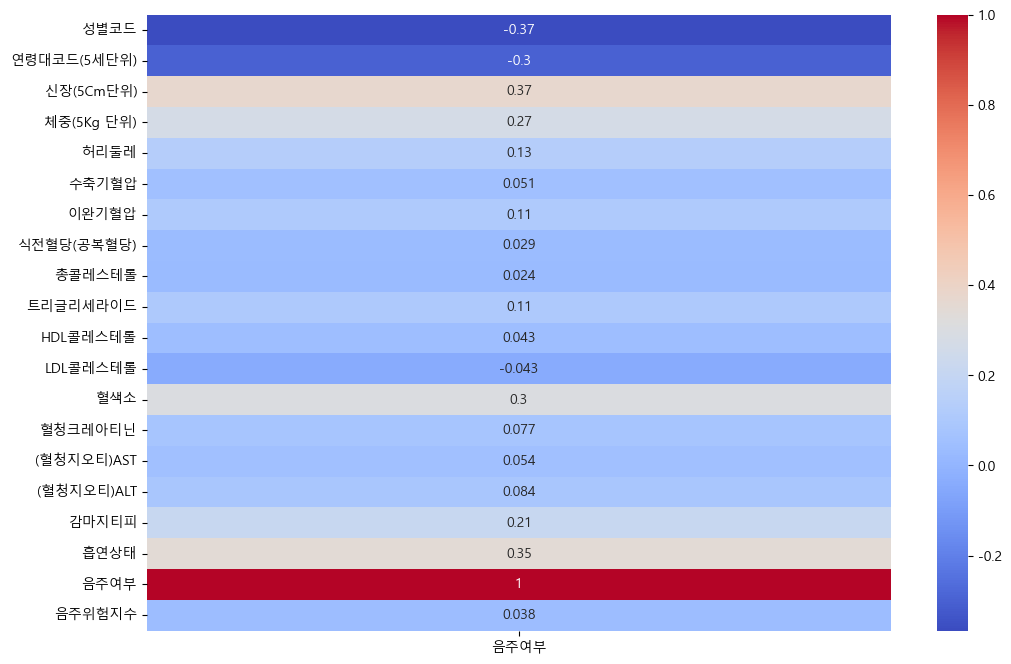

In [133]:
from matplotlib import rcParams

# 한글 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'  # 이 부분을 다른 폰트로 변경할 수 있습니다
rcParams['axes.unicode_minus'] = False     # 유니코드 마이너스 문제 해결

# 상관 행렬 계산
correlation_matrix = health.corr()

# 음주여부와의 상관 관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['음주여부']], annot=True, cmap='coolwarm')
plt.show()

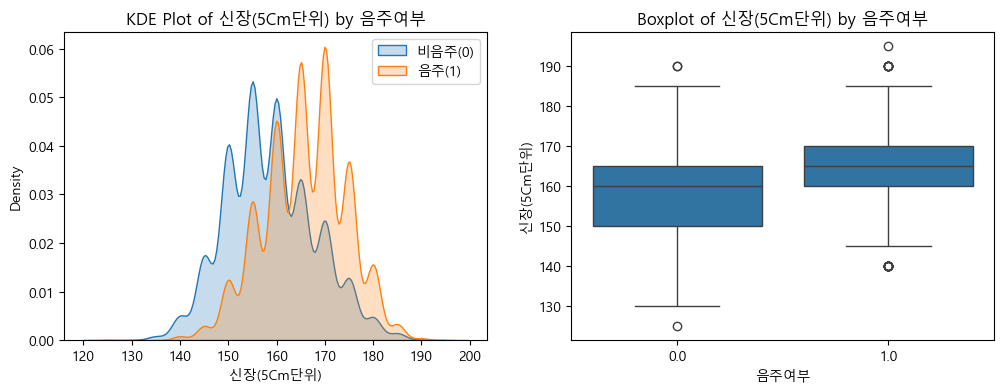

신장(5Cm단위) - KS Test 결과: 통계량(stat) = 0.3441, p-value = 0.0000
➡ 변수 '신장(5Cm단위)' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



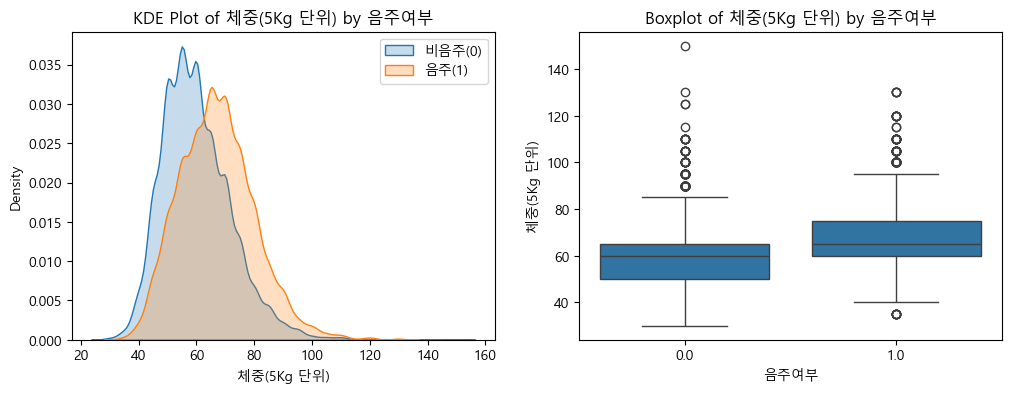

체중(5Kg 단위) - KS Test 결과: 통계량(stat) = 0.2638, p-value = 0.0000
➡ 변수 '체중(5Kg 단위)' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



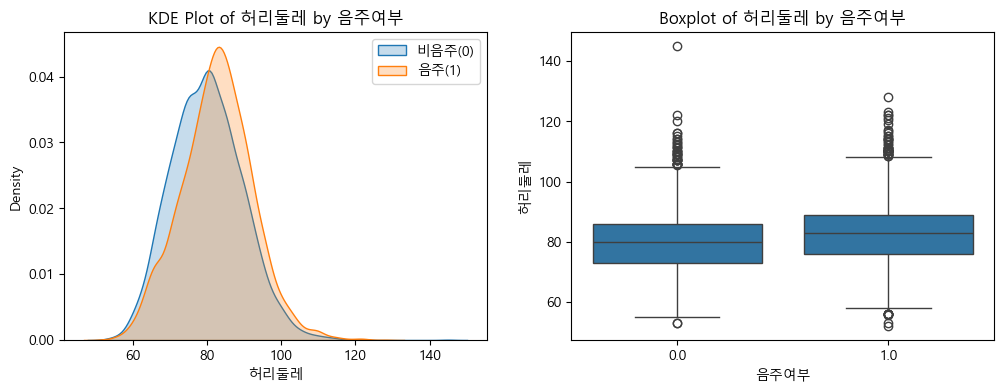

허리둘레 - KS Test 결과: 통계량(stat) = 0.1354, p-value = 0.0000
➡ 변수 '허리둘레' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



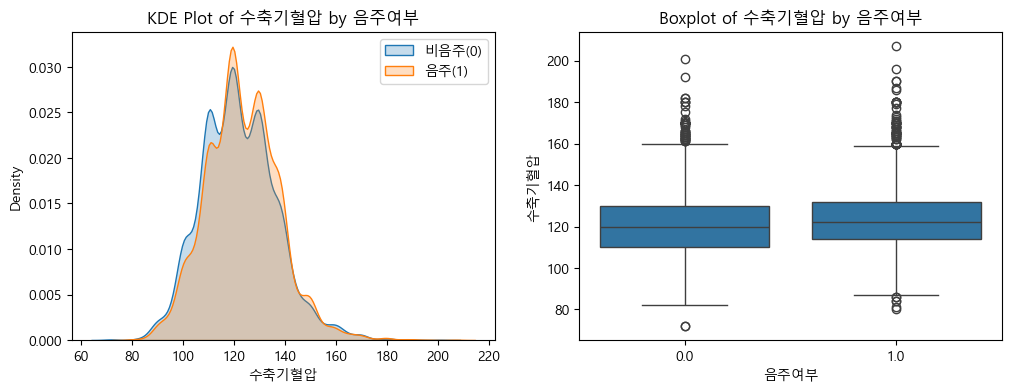

수축기혈압 - KS Test 결과: 통계량(stat) = 0.0573, p-value = 0.0000
➡ 변수 '수축기혈압' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



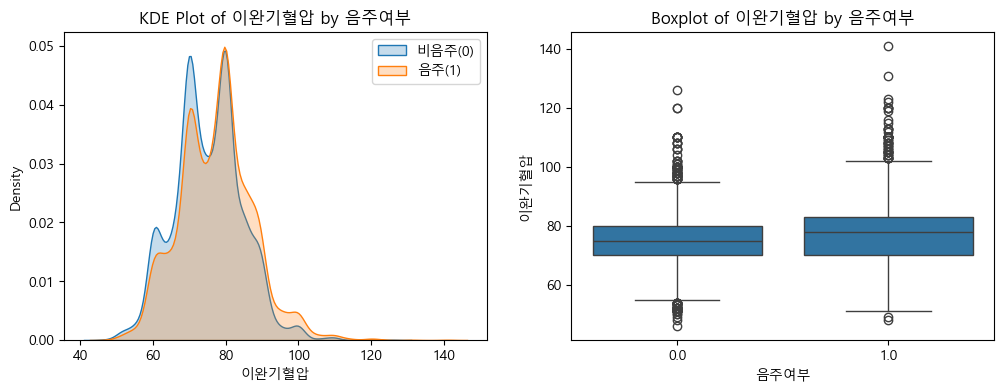

이완기혈압 - KS Test 결과: 통계량(stat) = 0.0910, p-value = 0.0000
➡ 변수 '이완기혈압' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



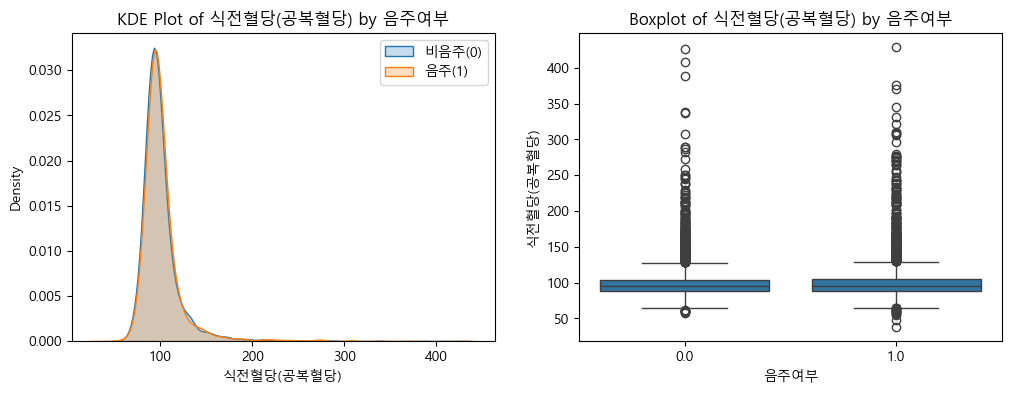

식전혈당(공복혈당) - KS Test 결과: 통계량(stat) = 0.0421, p-value = 0.0003
➡ 변수 '식전혈당(공복혈당)' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



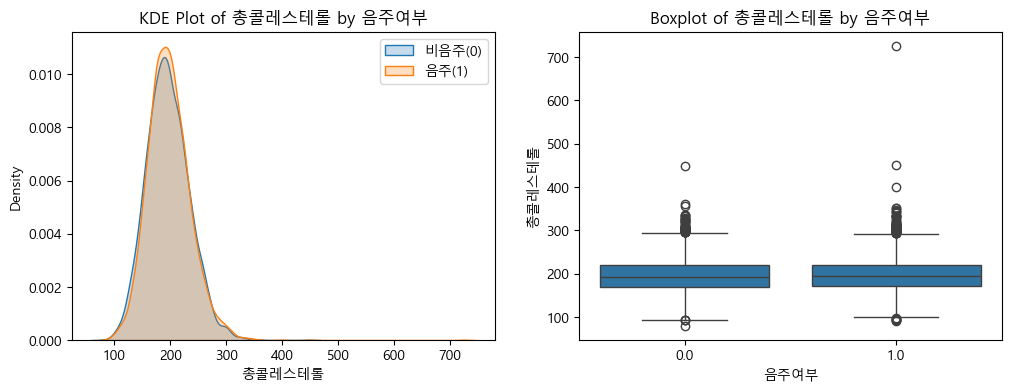

총콜레스테롤 - KS Test 결과: 통계량(stat) = 0.0305, p-value = 0.0187
➡ 변수 '총콜레스테롤' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



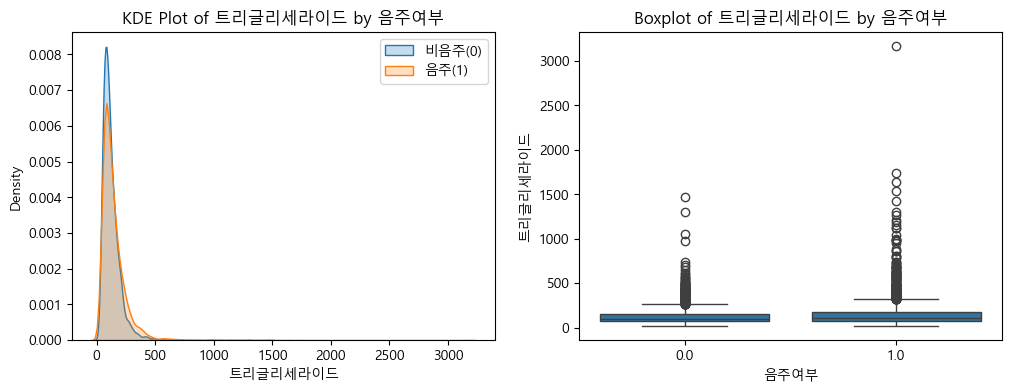

트리글리세라이드 - KS Test 결과: 통계량(stat) = 0.0836, p-value = 0.0000
➡ 변수 '트리글리세라이드' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



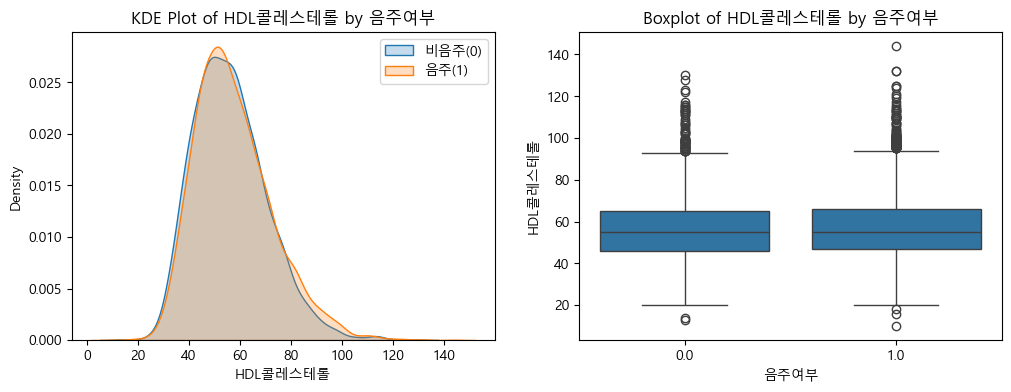

HDL콜레스테롤 - KS Test 결과: 통계량(stat) = 0.0296, p-value = 0.0246
➡ 변수 'HDL콜레스테롤' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


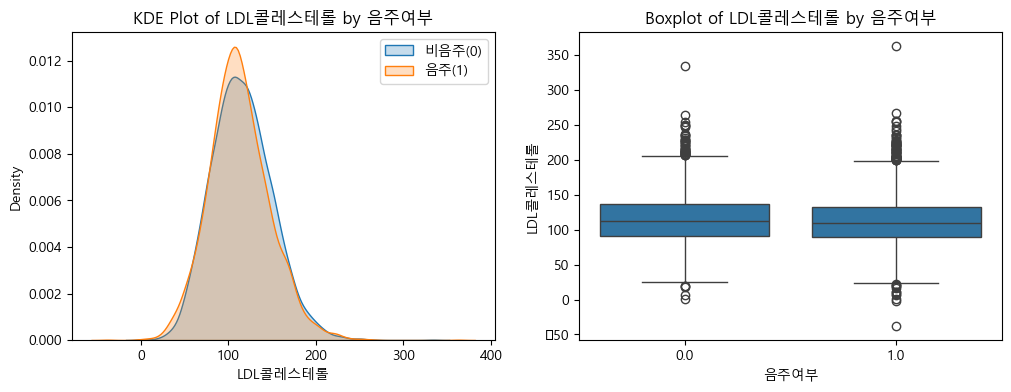

LDL콜레스테롤 - KS Test 결과: 통계량(stat) = 0.0540, p-value = 0.0000
➡ 변수 'LDL콜레스테롤' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



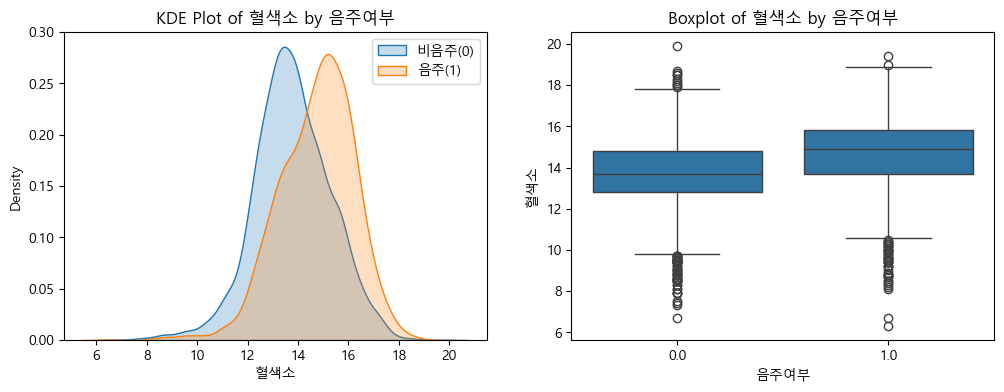

혈색소 - KS Test 결과: 통계량(stat) = 0.3049, p-value = 0.0000
➡ 변수 '혈색소' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



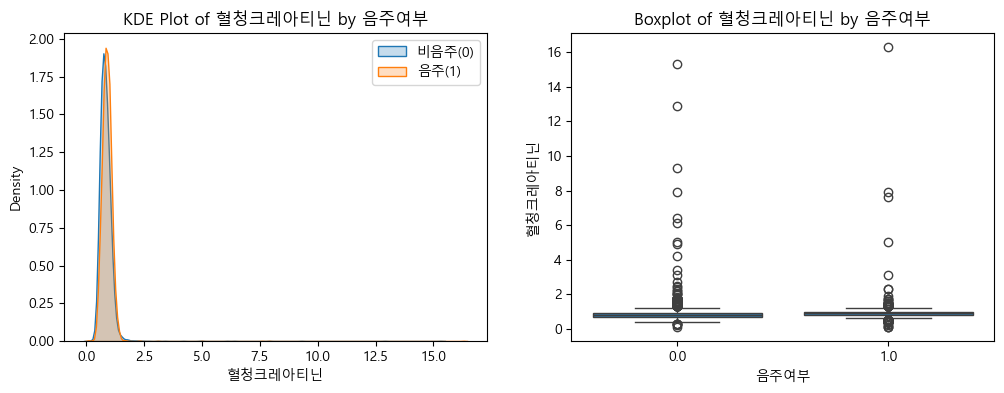

혈청크레아티닌 - KS Test 결과: 통계량(stat) = 0.1654, p-value = 0.0000
➡ 변수 '혈청크레아티닌' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



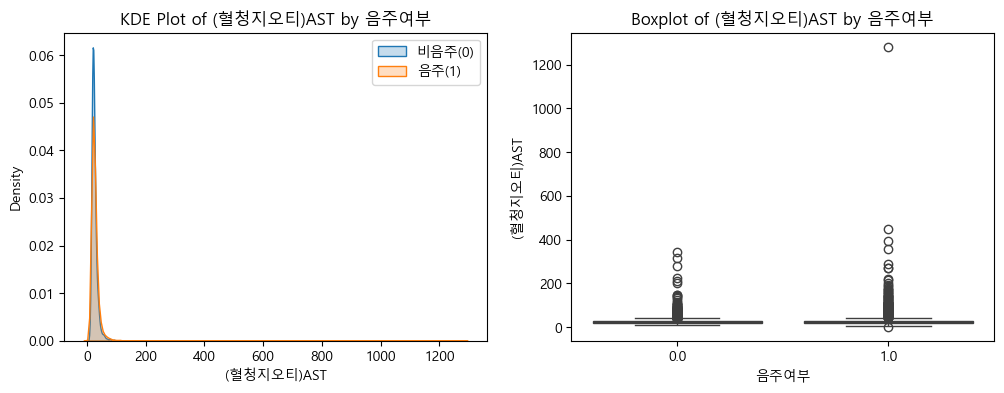

(혈청지오티)AST - KS Test 결과: 통계량(stat) = 0.0583, p-value = 0.0000
➡ 변수 '(혈청지오티)AST' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



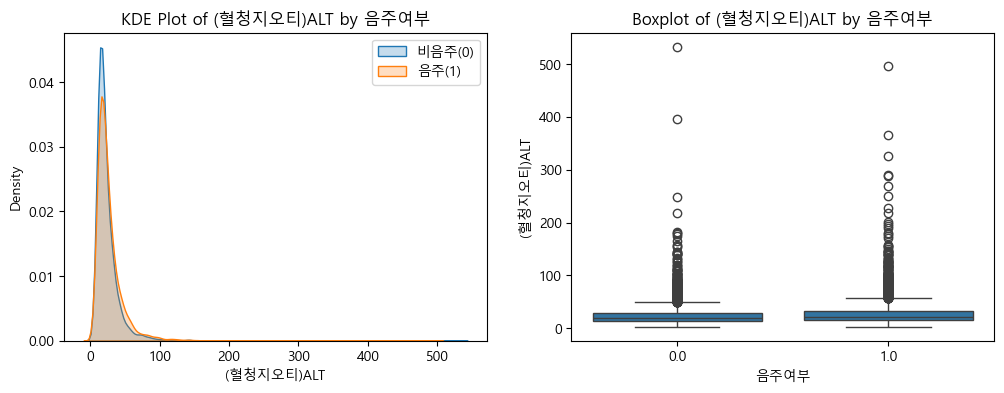

(혈청지오티)ALT - KS Test 결과: 통계량(stat) = 0.0946, p-value = 0.0000
➡ 변수 '(혈청지오티)ALT' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



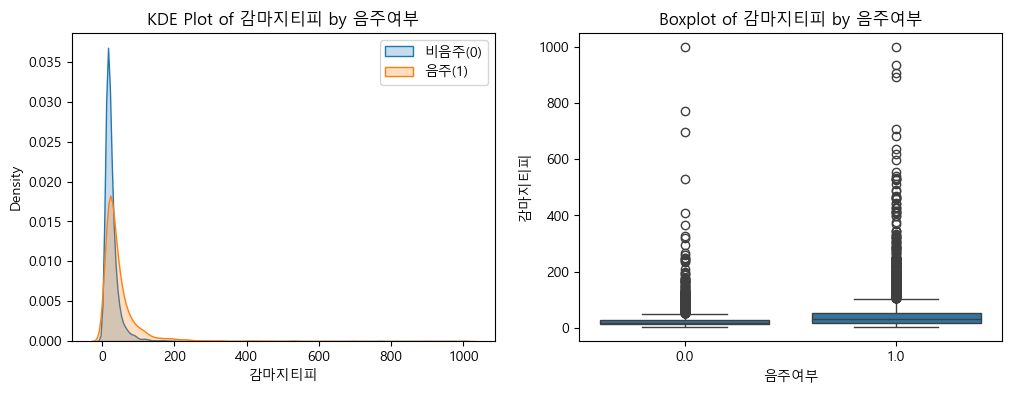

감마지티피 - KS Test 결과: 통계량(stat) = 0.2677, p-value = 0.0000
➡ 변수 '감마지티피' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)



In [89]:
from scipy.stats import ks_2samp

# 연속형 변수 리스트
continuous_cols = [
    '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '수축기혈압', '이완기혈압',
    '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
    '혈색소', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피'
]

for col in continuous_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # KDE Plot (음주여부별 분포)
    sns.kdeplot(health[health['음주여부'] == 0][col], label="비음주(0)", shade=True, ax=axes[0])
    sns.kdeplot(health[health['음주여부'] == 1][col], label="음주(1)", shade=True, ax=axes[0])
    axes[0].set_title(f'KDE Plot of {col} by 음주여부')
    axes[0].legend()
    
    # Boxplot (음주여부별 값 비교)
    sns.boxplot(x=health['음주여부'], y=health[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col} by 음주여부')

    plt.show()

    # KS 검정 수행
    stat, p_value = ks_2samp(health[health['음주여부'] == 0][col], health[health['음주여부'] == 1][col])
    print(f"{col} - KS Test 결과: 통계량(stat) = {stat:.4f}, p-value = {p_value:.4f}")

    # p-value 해석
    if p_value < 0.05:
        print(f"➡ 변수 '{col}' 은(는) 음주 여부에 따라 유의미한 차이가 있음 (p < 0.05)\n")
    else:
        print(f"➡ 변수 '{col}' 은(는) 음주 여부에 따라 유의미한 차이가 없음 (p >= 0.05)\n")

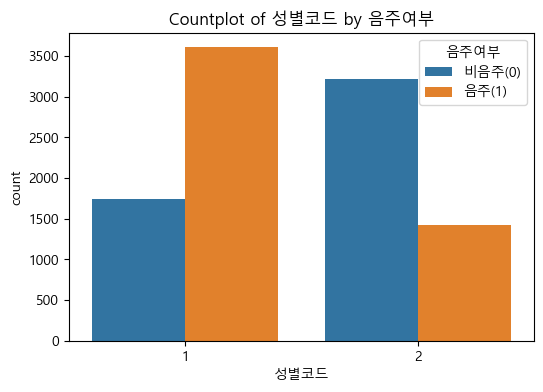

 성별코드 - Chi-Square Test 결과: 카이제곱 통계량 = 1341.7332, p-value = 0.0000
➡ 변수 '성별코드' 은(는) 음주 여부와 유의미한 연관이 있음 (p < 0.05)



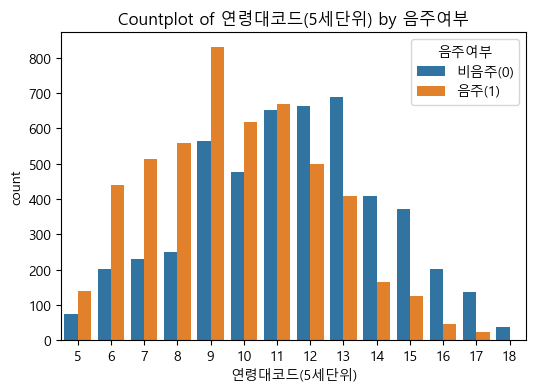

 연령대코드(5세단위) - Chi-Square Test 결과: 카이제곱 통계량 = 933.2975, p-value = 0.0000
➡ 변수 '연령대코드(5세단위)' 은(는) 음주 여부와 유의미한 연관이 있음 (p < 0.05)



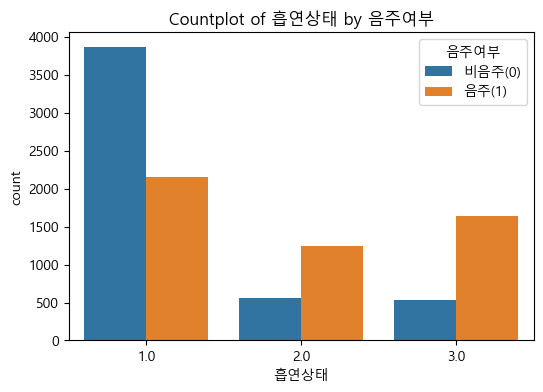

 흡연상태 - Chi-Square Test 결과: 카이제곱 통계량 = 1305.0983, p-value = 0.0000
➡ 변수 '흡연상태' 은(는) 음주 여부와 유의미한 연관이 있음 (p < 0.05)



In [46]:
import scipy.stats as stats

# 범주형 변수 리스트 (성별 제외)
categorical_cols = ['성별코드','연령대코드(5세단위)', '흡연상태']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="음주여부", data=health)
    plt.title(f'Countplot of {col} by 음주여부')
    plt.legend(title="음주여부", labels=["비음주(0)", "음주(1)"])
    plt.show()

    # 카이제곱 검정 수행
    contingency_table = pd.crosstab(health[col], health['음주여부'])
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    print(f" {col} - Chi-Square Test 결과: 카이제곱 통계량 = {chi2:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"➡ 변수 '{col}' 은(는) 음주 여부와 유의미한 연관이 있음 (p < 0.05)\n")
    else:
        print(f"➡ 변수 '{col}' 은(는) 음주 여부와 유의미한 연관이 없음 (p >= 0.05)\n")


### 파생변수 생성

#### 수축기 혈압과 이완기 혈압 데이터를 바탕으로 레이블 생성

In [139]:
def classify_blood_pressure(row):
    if row['수축기혈압'] >= 180 or row['이완기혈압'] >= 120:
        return 4  # 고혈압 위기
    elif row['수축기혈압'] >= 140 or row['이완기혈압'] >= 90:
        return 3  # 고혈압 2단계
    elif 130 <= row['수축기혈압'] <= 139 or 80 <= row['이완기혈압'] <= 89:
        return 2  # 고혈압 1단계
    elif 120 <= row['수축기혈압'] <= 129 and row['이완기혈압'] < 80:
        return 1  # 주의 혈압
    elif row['수축기혈압'] < 120 and row['이완기혈압'] < 80:
        return 0  # 정상
    else:
        return -1  # 정의되지 않은 상태

health['혈압단계'] = health.apply(classify_blood_pressure, axis=1)

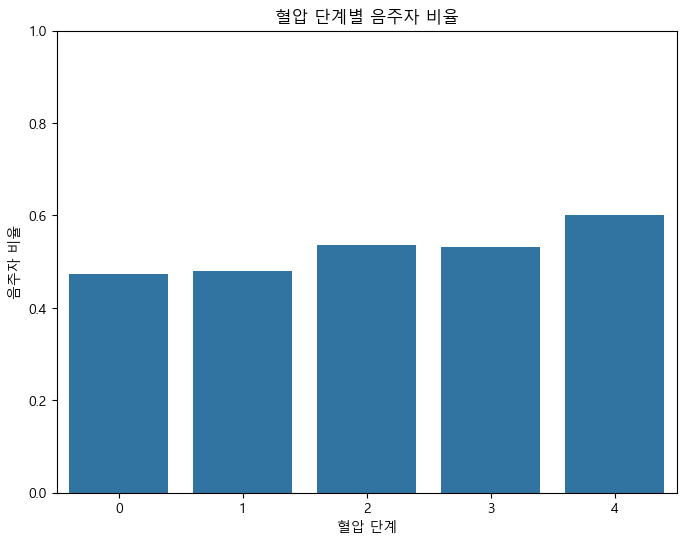

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 혈압단계와 음주여부 비율 계산
bp_drink_rate = health.groupby('혈압단계')['음주여부'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='혈압단계', y='음주여부', data=bp_drink_rate)
plt.title('혈압 단계별 음주자 비율')
plt.xlabel('혈압 단계')
plt.ylabel('음주자 비율')
plt.ylim(0, 1)  # 비율이니까 0~1 사이로 설정
plt.show()

In [116]:
# HDL은 낮을수록 위험하니까 역수를 사용
health['음주위험지수'] = (
    (health["총콜레스테롤"] + health["트리글리세라이드"] + health["LDL콜레스테롤"]) / 
    (health["HDL콜레스테롤"] + 1)  # 0으로 나누기 방지
)

In [144]:
df = health.copy()
df.drop(columns=['식전혈당(공복혈당)','이완기혈압','총콜레스테롤','트리글리세라이드','(혈청지오티)AST','(혈청지오티)ALT','HDL콜레스테롤','LDL콜레스테롤','혈청크레아티닌','수축기혈압'],inplace=True)

df.head()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,혈색소,감마지티피,흡연상태,음주여부,음주위험지수,혈압단계
0,1,11,160.0,70.0,88.0,12.2,14.0,2.0,0.0,11.375000,0
1,1,13,165.0,70.0,91.0,14.6,21.0,2.0,0.0,9.081081,0
2,2,8,160.0,55.0,73.0,9.9,17.0,1.0,1.0,8.363636,0
3,1,11,170.0,70.0,82.0,14.8,17.0,1.0,0.0,11.260000,0
4,1,13,155.0,50.0,90.0,15.1,53.0,3.0,1.0,13.019231,2


## 데이터 스케일링

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1. X, y 분리
X = df.drop(columns=['음주여부'])
y = df['음주여부']

# 2. 학습/테스트 데이터 분리 (스케일링 전에 분리)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 스케일링: 학습 데이터로 fit, 테스트 데이터는 transform만
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. 모델 생성 함수
def create_model(optimizer):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # 이진 분류용 출력층
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 5. 옵티마이저 리스트
optimizers = {
    'SGD': SGD(),
    'Momentum': SGD(momentum=0.9),
    'AdaGrad': Adagrad(),
    'RMSProp': RMSprop(),
    'Adam': Adam()
}

# 6. 훈련 및 평가 루프
results = []
probas_dict = {}      # ROC Curve 그래프용
history_dict = {}     # 학습 과정 그래프용

for name, optimizer in optimizers.items():
    print(f"Training with optimizer: {name}")
    model = create_model(optimizer)
    
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stop],
                        verbose=0)

    # 예측 및 평가
    y_pred_proba = model.predict(X_test).ravel()
    y_pred = (y_pred_proba > 0.5).astype('int32')

    from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    results.append({
        'Optimizer': name,
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1-Score': round(f1, 4),
        'Accuracy': round(acc, 4),
        'AUC': round(auc, 4)
    })

    # ROC Curve용 확률 저장
    probas_dict[name] = y_pred_proba

    # 학습 과정 저장
    history_dict[name] = history    
# 7. 결과 출력
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='AUC', ascending=False))

Training with optimizer: SGD


C:\Users\82109\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training with optimizer: Momentum


C:\Users\82109\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Training with optimizer: AdaGrad


C:\Users\82109\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training with optimizer: RMSProp


C:\Users\82109\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Training with optimizer: Adam


C:\Users\82109\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
  Optimizer  Precision  Recall  F1-Score  Accuracy     AUC
1  Momentum     0.6924  0.8227    0.7519    0.7245  0.7959
4      Adam     0.7075  0.7675    0.7363    0.7210  0.7942
0       SGD     0.7126  0.7645    0.7376    0.7240  0.7941
3   RMSProp     0.7037  0.7793    0.7396    0.7215  0.7939
2   AdaGrad     0.7147  0.7034    0.7090    0.7070  0.7796


## 각 Optimizer 별 성능 비교

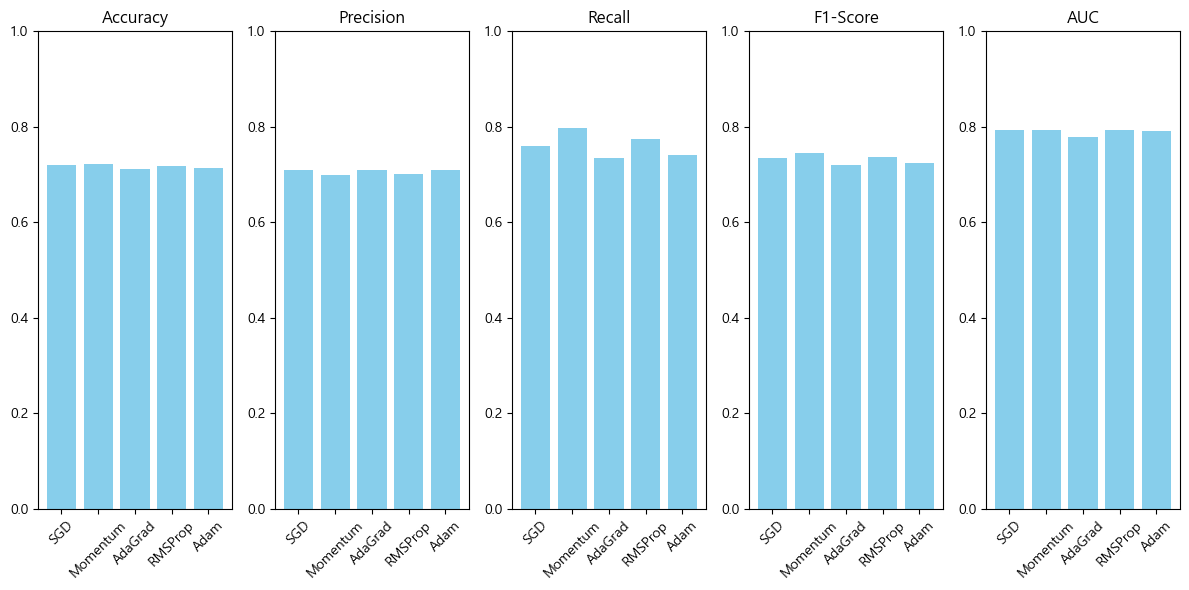

In [123]:
import matplotlib.pyplot as plt

# 옵티마이저 목록
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, len(metrics), i+1)
    plt.bar(results_df['Optimizer'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.ylim(0, 1)  # 이진 분류 기준 0~1
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## ROC Curve

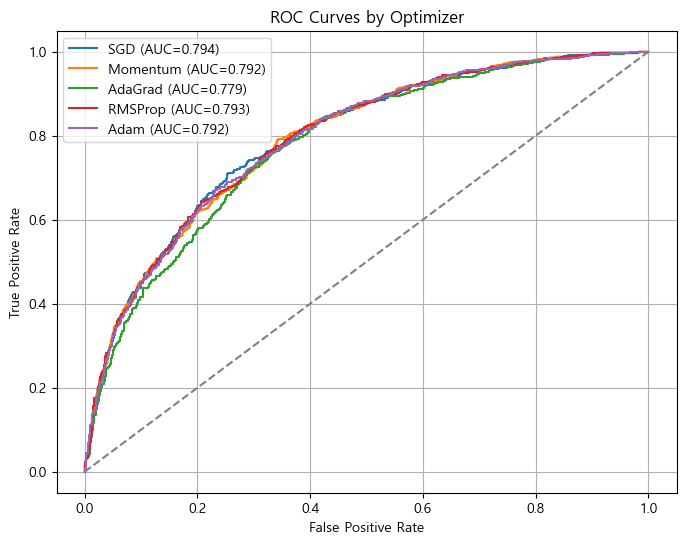

In [124]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))

for name, probs in probas_dict.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, probs):.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curves by Optimizer')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

## Accuracy/Loss 곡선 그래프

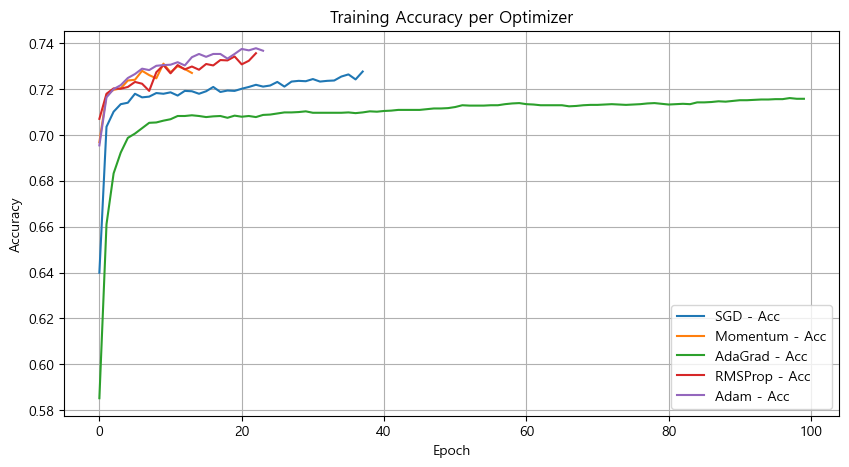

In [125]:
plt.figure(figsize=(10, 5))

for name, hist in history_dict.items():
    plt.plot(hist.history['accuracy'], label=f'{name} - Acc')

plt.title('Training Accuracy per Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()